In [35]:
import sys
sys.path.append("../")

from main import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ACTIONS = [0,1,2,3]

## Random Action Selection

Choosing action randomly.

In [3]:
mocked_args = [
    '--seed', '42', 
    '--verbose', '0', 
    '--episodes', '1', 
    '--timesteps', '1000'
]
episodes_actions, episodes_rewards = main(mocked_args)

Episode: 0
    Successfully finished after 507 steps. Sum(R): -18


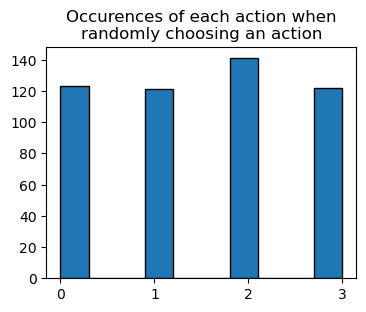

In [9]:
plt.figure(figsize=(4, 3))

plt.hist(episodes_actions, edgecolor='black')
plt.xticks(ACTIONS)
plt.title("Occurences of each action when\nrandomly choosing an action")
plt.show()

/Users/clemens.woest/opt/anaconda3/envs/reinforce-py/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


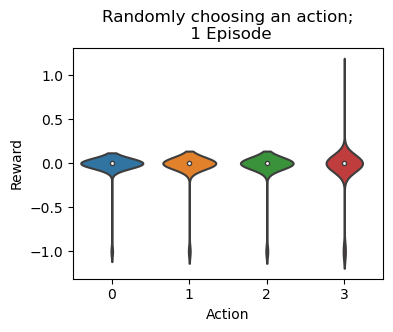

In [10]:
plt.figure(figsize=(4, 3))

sns.violinplot(x=episodes_actions[0], y=episodes_rewards[0])
plt.xticks(ACTIONS)
plt.xlabel("Action")
plt.ylabel("Reward")
plt.title("Randomly choosing an action;\n 1 Episode")
plt.show()

In [30]:
mocked_args = [
    '--seed', '42', 
    '--verbose', '0', 
    '--episodes', '10', 
    '--timesteps', '10_000'
]
episodes_actions, episodes_rewards = main(mocked_args)

Episode: 0
    Successfully finished after 179 steps. Sum(R): -9
Episode: 1
    Successfully finished after 35 steps. Sum(R): -1
Episode: 2
    Successfully finished after 327 steps. Sum(R): -17
Episode: 3
    Successfully finished after 604 steps. Sum(R): -17
Episode: 4
    Successfully finished after 442 steps. Sum(R): -16
Episode: 5
    Successfully finished after 396 steps. Sum(R): -1
Episode: 6
    Successfully finished after 393 steps. Sum(R): -12
Episode: 7
    Successfully finished after 260 steps. Sum(R): -1
Episode: 8
    Successfully finished after 265 steps. Sum(R): -2
Episode: 9
    Successfully finished after 126 steps. Sum(R): -1


In [46]:
steps_needed = []
for episode in episodes_actions:
    steps_needed.append(len(episode))
print(f"On average it took {np.mean(steps_needed):0.0f} +/- {np.std(steps_needed):0.0f} steps to reach the goal")

cum_rewards = []
for cum_reward in episodes_rewards:
    cum_rewards.append(np.sum(cum_reward))
print(f"On average the agent got {np.mean(cum_rewards):0.2f} +/- {np.std(cum_rewards):0.2f} reward")

On average it took 303 +/- 158 steps to reach the goal
On average the agent got -30.80 +/- 27.54 reward


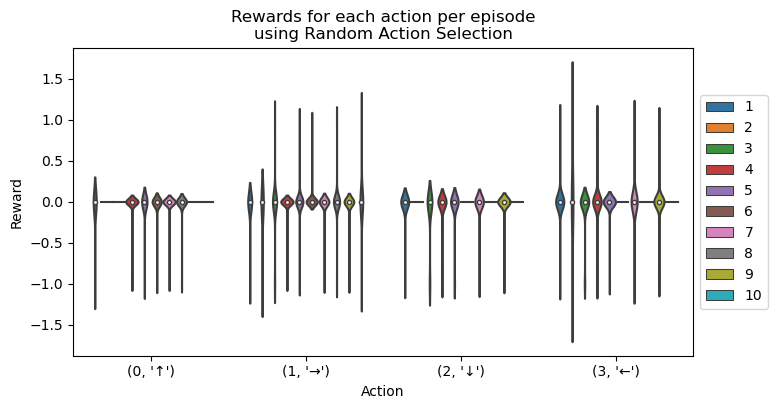

In [33]:
data = []
for i in range(10):
    for action, reward in zip(episodes_actions[i], episodes_rewards[i]):
        data.append([i+1, action, reward])
df = pd.DataFrame(data, columns=['Episode', 'Action', 'Reward'])

plt.figure(figsize=(8, 4))
sns.violinplot(x='Action', y='Reward', hue='Episode', data=df)
plt.xticks(range(4), list({0: '↑', 1: '→', 2: '↓', 3: '←'}.items()))

plt.title("Rewards for each action per episode\nusing Random Action Selection")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('../imgs/rdm_action_selection__violin_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## Value Iteration 

Instead of choosing an action randomly, now we will calculate a value estimate $V(s)$ per state $s$. A value is the expected cumulative reward of that state. 

The value iteration algorithm is defined as follows: 

$$
\begin{align*}

& \text{Input:} \; \text{MDP} \; M = < S, s_0, A, P_a(s', s), r(s,a,s') > \\
& \text{Output:} \; \text{Value function} \; V \\ 
\\ 
& \text{Set} \; V \; \text{to arbitrary value function; e.g.} \; V(s)=0 \; \text{for all} \; s \\ 
\\ 
& \text{Repeat} \\ 
& \qquad \Delta \leftarrow 0 \\ 
& \qquad \text{For each} \; s \in S \\ 
& \qquad \qquad V'(s) \leftarrow \max_{a \in A(s)} \sum_{s' \in S} P_a(s' | s) [ r(s,a,s') + \gamma V(s') ] \\ 
& \qquad \qquad \Delta \leftarrow \max(\Delta , | V'(s) - V(s)) \\ 
& \qquad V \leftarrow V' \\ 
& \text{Until} \; \Delta \leq \theta

\end{align*}
$$


In [ ]:
# Set the value function arbitrarily.
value_function = np.zeros((10, 10))



## Greedy Action Selection

Estimating values $Q(a)$. Greedyly choosing the action with the highest action value $Q(a)$.

Previously the agent only randomly choose actions. No value has been estimated state-action pair. 